<a href="https://colab.research.google.com/github/shruteeegrg/Machine-Learning-with-Python/blob/main/Reinforcement_Learning_with_Q_Learning_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Reinforcement Learning with Q-Learning**

**Open AI Gym**

In [39]:
!pip install gymnasium
!pip install gymnasium[toy_text]
!pip install pygame

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 958.1/958.1 kB 10.4 MB/s eta 0:00:00


In [40]:
import gymnasium as gym     # all you have to do to import and use open ai gym!

Once you import gym you can load an enviornment using the line ```gym.make("enviornment")```.

In [84]:
env = gym.make('FrozenLake-v1', render_mode="ansi")  # we are going to use the FrozenLake enviornment

In [85]:
print("The number of states:", env.observation_space.n)   # get number of states
print("The number of actions:",env.action_space.n)   # get number of actions

The number of states: 16
The number of actions: 4


In [86]:
env.reset()  # reset enviornment to default state

(0, {'prob': 1})

In [87]:
action = env.action_space.sample() # get a random action
print(action)

1


In [88]:
# Take the action, receive new state, reward, done flag, and info
new_state, reward, done, _, info = env.step(action) # take action, notice it returns information about the action

In [89]:
print(env.render() )
 # render the GUI for the enviornment

  (Down)
SFFF
FHFH
FFFH
HFFG



###Frozen Lake Enviornment
Now that we have a basic understanding of how the gym enviornment works it's time to discuss the specific problem we will be solving.

The enviornment we loaded above ```FrozenLake-v1``` is one of the simplest enviornments in Open AI Gym. The goal of the agent is to navigate a frozen lake and find the Goal without falling through the ice (render the enviornment above to see an example).

There are:
- 16 states (one for each square)
- 4 possible actions (LEFT, RIGHT, DOWN, UP)
- 4 different types of blocks (F: frozen, H: hole, S: start, G: goal)



**Building the Q-Table**

In [93]:
import gymnasium as gym
import numpy as np
import time

env = gym.make('FrozenLake-v1', render_mode="ansi")
STATES = env.observation_space.n
ACTIONS = env.action_space.n

In [94]:
Q = np.zeros((STATES, ACTIONS))  # create a matrix with all 0 values
Q

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

 **Constant**

In [95]:
EPISODES = 2000 # how many times to run the enviornment from the beginning
MAX_STEPS = 100  # max number of steps allowed for each run of enviornment

LEARNING_RATE = 0.81  # learning rate
GAMMA = 0.96

###Picking an Action
Remember that we can pick an action using one of two methods:
1. Randomly picking a valid action
2. Using the current Q-Table to find the best action.

Here we will define a new value $\epsilon$ that will tell us the probabillity of selecting a random action. This value will start off very high and slowly decrease as the agent learns more about the enviornment.

In [96]:
epsilon = 0.9  # start with a 90% chance of picking a random action

# code to pick action
if np.random.uniform(0, 1) < epsilon:  # we will check if a randomly selected value is less than epsilon.
    action = env.action_space.sample()  # take random action
else:
    action = np.argmax(Q[state, :])  # use Q table to pick best action based on current values

###Updating Q Values
The code below implements the formula discussed above.

**Putting it together**

In [105]:
import gymnasium as gym
import numpy as np
import time

env = gym.make('FrozenLake-v1', render_mode="ansi")
STATES = env.observation_space.n
ACTIONS = env.action_space.n

Q = np.zeros((STATES, ACTIONS))

EPISODES = 1500  # Number of episodes
MAX_STEPS = 100  # Max steps per episode

LEARNING_RATE = 0.81  # Learning rate
GAMMA = 0.96  # Discount factor

RENDER = False  # Whether to render the environment during training

epsilon = 0.9  # Exploration factor


In [106]:
rewards = []

for episode in range(EPISODES):
    state, _ = env.reset()  # Reset the environment and get the initial state
    total_reward = 0  # To track the total reward in each episode
    for _ in range(MAX_STEPS):

        if RENDER:
            env.render()

        # Exploration vs Exploitation: choose an action
        if np.random.uniform(0, 1) < epsilon:
            action = env.action_space.sample()  # Exploration: random action
        else:
            action = np.argmax(Q[state, :])  # Exploitation: choose the best action

        # Take the action and observe the new state and reward
        new_state, reward, done, _, info = env.step(action)

        # Update the Q-value using the Q-learning formula
        Q[state, action] = Q[state, action] + LEARNING_RATE * (reward + GAMMA * np.max(Q[new_state, :]) - Q[state, action])

        # Update state
        state = new_state
        total_reward += reward

        if done:
            rewards.append(total_reward)
            epsilon -= 0.001  # Decaying epsilon (exploration factor)
            break  # Exit if episode is done

print(Q)
print(f"Average reward: {sum(rewards) / len(rewards)}")


[[1.95133019e-01 2.16569072e-02 1.94395191e-02 2.08507106e-02]
 [3.07304689e-03 6.40167138e-03 2.38474761e-03 1.84290915e-01]
 [2.95041495e-03 6.89335319e-03 6.68085253e-03 2.75541390e-01]
 [9.25549263e-03 1.90289479e-03 2.47195964e-03 1.30627440e-01]
 [2.18893485e-01 5.98043774e-03 2.02489750e-02 1.97221631e-02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [3.32303179e-04 1.20777898e-04 2.87211872e-02 2.95052565e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [2.20356999e-04 8.34860671e-03 4.04218442e-03 5.99525154e-01]
 [8.70668421e-03 6.96053721e-01 1.05466392e-02 3.29921950e-03]
 [9.01483416e-01 4.88174421e-03 5.04911292e-03 3.42171147e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [7.40447729e-02 1.36031397e-01 5.99347268e-01 1.23789574e-02]
 [1.97538917e-01 9.23576566e-01 2.07874300e-01 2.22981641e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.000000

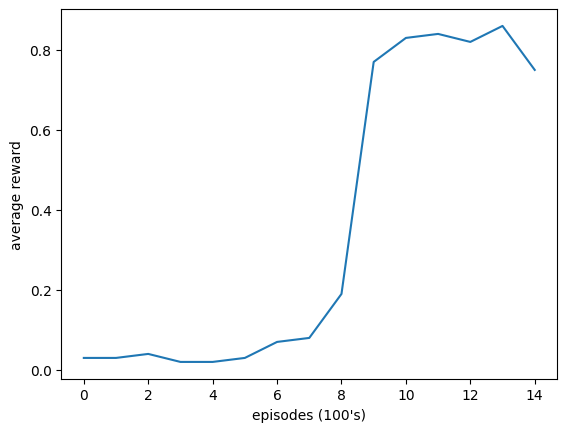

In [107]:
# we can plot the training progress and see how the agent improved
import matplotlib.pyplot as plt

def get_average(values):
  return sum(values)/len(values)

avg_rewards = []
for i in range(0, len(rewards), 100):
  avg_rewards.append(get_average(rewards[i:i+100]))

plt.plot(avg_rewards)
plt.ylabel('average reward')
plt.xlabel('episodes (100\'s)')
plt.show()